# Topic:- Stroke Prediction Model

Made By:

Kushal Shah

In [1]:
# Impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#get the size of dataframe
df.shape

(5110, 12)

Observation: There are 5110 rows and 12 columns in the dataset.

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Observations:

id, hypertension, heart_disease and stroke are of integer datatype.

gender, ever_married, work_type, Residence_type and smoking_status are of object datatype.

age, avg_glucose_level and bmi are of float datatype.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observation: Only bmi column has certain missing values.

In [6]:
# handling missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df = df.drop(["id"],axis="columns")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [8]:
X=df.iloc[:,:-1] #feature
Y=df.iloc[:,10].values #classtable
Y = df[['stroke']]
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [9]:
# converting object data to integer
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,1
1,0,82,0,0,1,3,0,3588,162,2
2,1,101,0,1,1,2,0,2483,199,2
3,0,70,0,0,1,2,1,3385,218,3
4,0,100,1,0,1,3,0,3394,113,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1


# NAIVE BAYS CLASSIFICATION

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(3832, 1278, 3832, 1278)

In [11]:
naive=GaussianNB()
naive_model=naive.fit(x_train,y_train)
naive_model
print('The model has ran Successfully!!')

The model has ran Successfully!!


C:\Users\aadit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_test['Predicted_NBC'] = naive_model.predict(x_test)

In [13]:
y_test

,stroke,Predicted_NBC
4688,0,0
4478,0,0
3849,0,0
4355,0,1
3826,0,0
...,...,...
1533,0,0
2437,0,0
3164,0,0
92,1,0


In [14]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_NBC']))

[[1083  115]
 [  51   29]]


In [15]:
accuracy_nbc= accuracy_score(y_test['stroke'],y_test['Predicted_NBC'])
accuracy_nbc = np.round(accuracy_nbc,2)
print('The Accuracy of Naive Bays Calssification model is: ',accuracy_nbc)

The Accuracy of Naive Bays Calssification model is:  0.87


# DECISION TREE CLASSIFICATION

In [16]:
regressor = DecisionTreeClassifier(criterion = 'gini',max_depth=5,splitter='best')
regressor.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

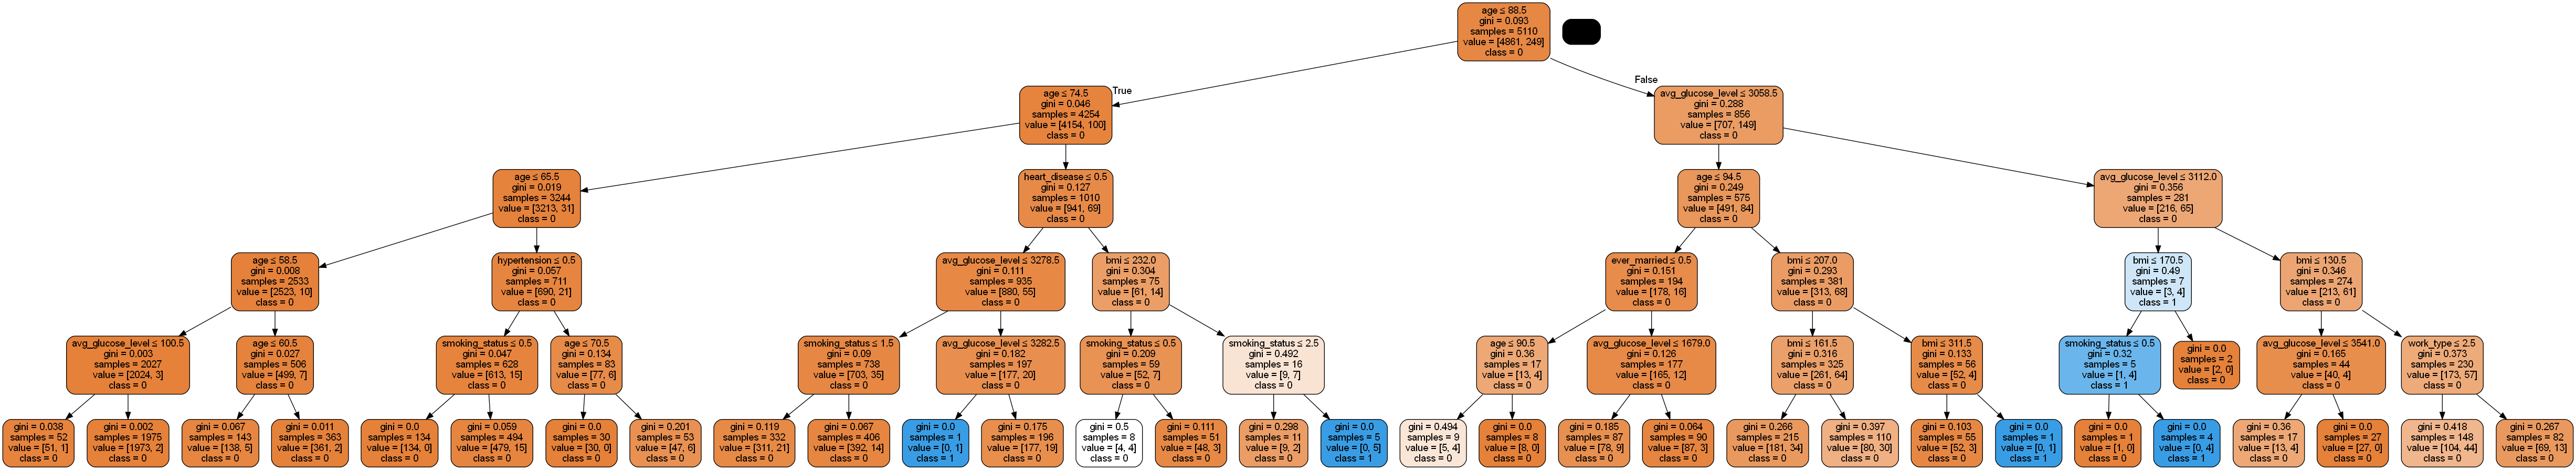

In [17]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png("Tree.png")

In [18]:
y_test['Predicted_DTC'] = regressor.predict(x_test)

In [19]:
y_test

,stroke,Predicted_NBC,Predicted_DTC
4688,0,0,0
4478,0,0,0
3849,0,0,0
4355,0,1,0
3826,0,0,0
...,...,...,...
1533,0,0,0
2437,0,0,0
3164,0,0,0
92,1,0,0


In [20]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_DTC']))

[[1198    0]
 [  78    2]]


In [21]:
accuracy_dtc= accuracy_score(y_test['stroke'],y_test['Predicted_DTC'])
accuracy_dtc = np.round(accuracy_dtc,2)
print('The Accuracy of Decision Tree Classifier model is: ',accuracy_dtc)

The Accuracy of Decision Tree Classifier model is:  0.94


# K-means Clustering Algorithm

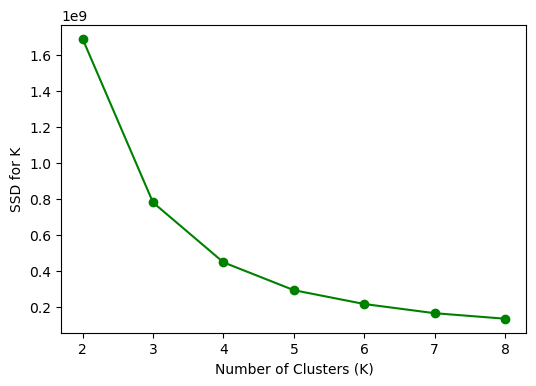

In [22]:
ssd = []
for k in range(2,9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6,4), dpi=100)
plt.plot(range(2,9),ssd,color='green',marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [23]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(scaled_X)
clusters

array([0, 2, 0, ..., 2, 2, 2])

In [24]:
df.insert(df.columns.get_loc("gender"),"Cluster",clusters)
df

,Cluster,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,2,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,2,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,2,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [25]:
df["Cluster"].value_counts()

2    3328
1    1506
0     276
Name: Cluster, dtype: int64